### Predictive Analysis on Bank Marketing Dataset

** Bank Marketing Dataset contains both type variables 'Categorical' and 'Numerical'.

** Categorical Variable:

    * Marital - (Married , Single , Divorced)
    * Job - (Management,Blue-Collar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
    * Contact - (Telephone,Cellular,Unknown)
    * Education - (Primary,Secondary,Tertiary,Unknown)
    * Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
    * Poutcome - (Success,Failure,Other,Unknown)
    * Housing - (Yes/No)
    * Loan - (Yes/No)
    * is_success - (Yes/No)
    * Default - (Yes/No)
    
** Numerical Variable:

    * Age
    * Balance
    * Day
    * Duration
    * Campaign
    * Pdays
    * Previous
    
    
    ** Mean, Standard Deviation, Min, Max, Quantile output of all numerical variable:
    
        
        |Desc   |age     |balance  |duration|campaign|pdays    |previous|day      |
        |-------|--------|---------|--------|--------|---------|--------|---------|
        |count  |45211.00|45211.00 |45211.00|45211.00|45211.00 |45211.00|45211.00 |
        |-------|--------|---------|--------|--------|---------|--------|---------|
        |mean   |40.93   |1362.27  |258.16  |2.76    |40.19    |0.58    |15.80    |
        |-------|--------|---------|--------|--------|---------|--------|---------|
        |std    |10.61   |3044.76  |257.52  |3.09    |100.12   |2.30    |8.32     |
        |-------|--------|---------|--------|--------|---------|--------|---------|
        |min    |18.00   |-8019.00 |0.00    |1.00    |-1.00    |0.00    |1.00     | 
        |-------|--------|---------|--------|--------|---------|--------|---------|
        |25%    |33.00   |72.00    |103.00  |1.00    |-1.00    |0.00    |8.00     |
        |-------|--------|---------|--------|--------|---------|--------|---------|
        |50%    |39.00   |448.00   |180.00  |2.00    |-1.00    |0.00    |16.00    |
        |-------|--------|---------|--------|--------|---------|--------|---------|
        |75%    |48.00   |1428.00  |319.00  |3.00    |-1.00    |0.00    |21.00    |
        |-------|--------|---------|--------|--------|---------|--------|---------|
        |max    |95.00   |102127.00|4918.00 |63.00   |871.00   |275.00  |31.00    |
         
         
  ** Understanding above table :
  
  ** Outlier : " data_point > (Q3 * 1.5) " is said to be outlier
  
  #### Age: 
          
   ** Average age of the people in the dataset is ~41 with std of 10.61
   
   ** Min. age is 18
   
   ** Max. age is 95
   
   ** quantile 75%(percentile) refers that 75 percentage of the people have 48 or less age !
   
   ** As 95 is max, there is great chance that its a outlier "48*(3/2) = 72". So anything greater than 72 is outlier.
          
  #### Balance: 
          
   ** Average balance of the people in the dataset is (approx)1326.27 with std of 3044.76, as standard deviation is quite huge it means that balance is wide spread across the dataset.
   
   ** Min. balance is -8019
   
   ** Max. balance is 102127
   
   ** quantile 75%(percentile) refers that 75 percentage of the people have 1428 or less balance.
   
   ** while comparing with 75% quantile, 102127 is very huge and its a outlier data point.
          
  #### Duration: 
          
   ** Average duration of the people speaking in the dataset is (approx)258.16 with std of 257.52, as standard deviation is quite huge it means that duration is wide spread across the dataset.
   
   ** Min. duration is 0
   
   ** Max. duration is 4918
   
   ** quantile 75%(percentile) refers that 75 percentage of the people spoke for 319 seconds or less.
   
   ** while comparing with 75% quantile, 4918 is a outlier data point.

  #### Pdays: 
          
   ** Average no. of days passed after the client was contacted from previous campaign in the dataset is (approx)40.19 with std of 100.12.
   
   ** Min. pdays is -1
   
   ** Max. pdays is 871
   
   ** quantile 75%(percentile),for 75% of records it is -1 days, which means the Client was not contacted. 
          
  #### Campaign: 
          
   ** Average no. of contacts performed during the current campaign for a client in the dataset is (approx)2.76 with std of 3.09.
   
   ** Min. balance is 1
   
   ** Max. balance is 63
   
   ** quantile 75%(percentile),for 75% of records, 3 times the client has been contacted in the current campaign for a client.
   
   ** while comparing with 75% quantile,63 is a outlier data point.
          
  #### Previous:
      
   ** Average no. of contacts performed before this campaign for a client in the dataset is (approx)0.58 with std of 2.30.
   
   ** Min. balance is 0
   
   ** Max. balance is 275
   
   ** quantile 75%(percentile),for 75% of records, 0 times the client has been contacted before this campaign.
   
   ** while comparing with 75% quantile,275 is a outlier data point.
   

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit

data = pd.read_csv('D:/textAnalysis/marketing-data.csv',sep=',',header='infer')
data = data.drop(['day'],axis=1)

def binaryType_(data):
    
    data.is_success.replace(('yes', 'no'), (1, 0), inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    data.marital.replace(('married','single','divorced'),(1,2,3),inplace=True)
    data.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    data.education.replace(('primary','secondary','tertiary','unknown'),(1,2,3,4),inplace=True)
    
    return data

data = binaryType_(data)

# for k in range(len(data.contact.unique())):
#     data["contact_"+str(data.contact.unique()[k])] = (data.contact == data.contact.unique()[k]).astype(int)

# for l in range(len(data.education.unique())):
#     data['education_'+str(data.education.unique()[l])] = (data.education == data.education.unique()[l]).astype(int)

# for n in range(len(data.month.unique())):
#     data['month_'+str(data.month.unique()[n])] = (data.month == data.month.unique()[n]).astype(int)


#print(data.day.describe())
#print(data.head())

In [123]:
#data = data.drop(['education'],axis=1)
#data = data.drop(['marital'],axis=1)
#data = data.drop(['contact'],axis=1)
data = data.drop(['poutcome'],axis=1)
#data = data.drop(['month'],axis=1)
#data = data.drop(['job'],axis=1)
data['duration'] = data['duration']/60

In [124]:
def age_(data):
    
    data['Adult']
    data.loc[(data['age'] <= 30) & (data['age'] >= 18),'Adult'] = 1
    data.loc[(data['age'] <= 45) & (data['age'] >= 31),'Middle Age'] = 2
    data.loc[(data['age'] <= 60) & (data['age'] >= 46),'Elder'] = 3
    data.loc[data['age'] >=61,'old'] = 4
    
    return data

data = age_(data)

def campaign_(data):
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

data = campaign_(data)
#print(data.campaign.value_counts())
def duration_(data):
    
    data.loc[data['duration'] < 1,'duration'] = 0
    data.loc[(data['duration'] >= 1) & (data['duration'] <= 3),'duration'] = 1
    data.loc[(data['duration'] > 3) & (data['duration'] <= 5),'duration'] = 2
    data.loc[(data['duration'] > 5) & (data['duration'] <= 8),'duration'] = 3
    data.loc[data['duration'] > 8,'duration'] = 4
    
    return data

data = duration_(data)

def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['pdays_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data.loc[(data['pdays'] >= 1) & (data['pdays'] <=50) ,'pdays_passed'] = 1
    data.loc[(data['pdays'] >= 51) & (data['pdays'] <=100) ,'pdays_passed'] = 2
    data.loc[data['pdays'] >= 101,'pdays_passed'] = 3
    
    return data

data = pdays_(data)

def previous_(data):
    
    data['Not Contacted'] = 0
    data['Contacted'] = 0
    data.loc[data['previous'] == 0 ,'Not Contacted'] = 1
    data.loc[(data['previous'] >= 1) & (data['pdays'] <=50) ,'Contacted'] = 1
    data.loc[(data['previous'] >= 51) & (data['pdays'] <=100) ,'Contacted'] = 2
    data.loc[data['previous'] >= 101,'Contacted'] = 3
    
    return data

data = previous_(data)

def balance_(data):
    data['Neg. Balance'] = 0
    data['No Balance'] = 0
    data['Pos. Balance'] = 0
    
    data.loc[~data['balance']<0,'Neg. Balance'] = 1
    data.loc[data['balance'] == 0,'No Balance'] = 1
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'Pos. Balance'] = 1
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'Pos. Balance'] = 2
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'Pos. Balance'] = 3
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'Pos. Balance'] = 4
    data.loc[data['balance'] >= 10001,'Pos. Balance'] = 5
    
    return data

def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data

data = balance_(data)
data = job_(data)
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'is_success', 'pdays_not_contacted', 'pdays_passed', 'Not Contacted',
       'Contacted', 'Neg. Balance', 'No Balance', 'Pos. Balance'],
      dtype='object')


In [125]:
print (data[['age', 'is_success']].groupby(['age'], as_index=False).mean())
print (data[['job', 'is_success']].groupby(['job'], as_index=False).mean())
print (data[['duration', 'is_success']].groupby(['duration'], as_index=False).mean())
print (data[['pdays', 'is_success']].groupby(['pdays'], as_index=False).mean())
print (data[['campaign', 'is_success']].groupby(['campaign'], as_index=False).mean())
print (data[['Neg. Balance', 'is_success']].groupby(['Neg. Balance'], as_index=False).mean())
print (data[['Pos. Balance', 'is_success']].groupby(['Pos. Balance'], as_index=False).mean())
print (data[['No Balance', 'is_success']].groupby(['No Balance'], as_index=False).mean())

   age  is_success
0    1    0.162873
1    2    0.098808
2    3    0.097813
3    4    0.422559
    job  is_success
0     1    0.137556
1     2    0.110570
2     3    0.082717
3     4    0.072750
4     5    0.227915
5     6    0.122027
6     7    0.088830
7     8    0.118429
8     9    0.155027
9    10    0.286780
10   11    0.087903
11   12    0.118056
   duration  is_success
0       0.0    0.001932
1       1.0    0.038887
2       2.0    0.109176
3       3.0    0.167613
4       4.0    0.410835
     pdays  is_success
0       -1    0.091573
1        1    0.400000
2        2    0.054054
3        3    0.000000
4        4    0.500000
5        5    0.000000
6        6    0.100000
7        7    0.000000
8        8    0.000000
9        9    0.250000
10      10    0.666667
11      12    0.000000
12      13    0.500000
13      14    0.111111
14      15    0.000000
15      17    0.250000
16      18    0.000000
17      19    0.000000
18      20    0.500000
19      21    0.250000
20      22    0.33

In [126]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),'Linear Discriminant Analysis':LinearDiscriminantAnalysis()}#,'Logistic Regression':LogisticRegression(),'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}#'Decision Tree Classifier':DecisionTreeClassifier(),'Gaussian Naive Bayes Classifier':GaussianNB(),'Support Vector Classifier':SVC(probability=True),}

data_y = pd.DataFrame(data['is_success'])
#print(data_y.head())
data_X = data.drop(['is_success','balance','previous','pdays'],axis=1)
#print(data_X.head())
log_cols = ["Classifier", "Accuracy"]
metrics_cols = ['Precision Score','Recall Score','F1-Score']
log = pd.DataFrame(columns=log_cols)
metric = pd.DataFrame(columns=metrics_cols)



rs = StratifiedShuffleSplit(n_splits=3, test_size=0.3)
rs.get_n_splits(data_X,data_y)

for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy]], columns=log_cols)
        metric_entry = pd.DataFrame([[precision,recall,f1_score]], columns=metrics_cols)
        log = log.append(log_entry)
        metric = metric.append(metric_entry)
        
        
print(log)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

                     Classifier  Accuracy
0  Gradient Boosting Classifier  0.898408
0  Gradient Boosting Classifier  0.893394
0  Gradient Boosting Classifier  0.894942
0  Adaptive Boosting Classifier  0.887349
0  Adaptive Boosting Classifier  0.888750
0  Adaptive Boosting Classifier  0.888750
0  Linear Discriminant Analysis  0.883958
0  Linear Discriminant Analysis  0.889855
0  Linear Discriminant Analysis  0.885358


In [127]:
print(data.is_success.value_counts())

0    39922
1     5289
Name: is_success, dtype: int64


In [128]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),'Linear Discriminant Analysis':LinearDiscriminantAnalysis()}#,'Logistic Regression':LogisticRegression(),'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}#'Decision Tree Classifier':DecisionTreeClassifier(),'Gaussian Naive Bayes Classifier':GaussianNB(),'Support Vector Classifier':SVC(probability=True),}

data_y = pd.DataFrame(data['is_success'])
#print(data_y.head())
data_X = data.drop('is_success',axis=1)
#print(data_X.head())
log_cols = ["Classifier", "Accuracy"]
metrics_cols = ['Precision Score','Recall Score','F1-Score']
log = pd.DataFrame(columns=log_cols)
metric = pd.DataFrame(columns=metrics_cols)



rs = ShuffleSplit(n_splits=3, test_size=0.3)
rs.get_n_splits(data_X,data_y)

for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy]], columns=log_cols)
        metric_entry = pd.DataFrame([[precision,recall,f1_score]], columns=metrics_cols)
        log = log.append(log_entry)
        metric = metric.append(metric_entry)
        
        
print(log)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

                     Classifier  Accuracy
0  Gradient Boosting Classifier  0.897597
0  Gradient Boosting Classifier  0.895827
0  Gradient Boosting Classifier  0.894721
0  Adaptive Boosting Classifier  0.891109
0  Adaptive Boosting Classifier  0.891330
0  Adaptive Boosting Classifier  0.886980
0  Linear Discriminant Analysis  0.884179
0  Linear Discriminant Analysis  0.884842
0  Linear Discriminant Analysis  0.882041


In [129]:
print(metric)

   Precision Score  Recall Score  F1-Score
0         0.758876      0.625467  0.660533
0         0.773911      0.624490  0.661023
0         0.769214      0.627422  0.663460
0         0.737172      0.635290  0.666313
0         0.739955      0.633501  0.665127
0         0.714494      0.625950  0.653404
0         0.725896      0.623013  0.652280
0         0.722237      0.619149  0.648023
0         0.696330      0.606426  0.631540


In [130]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,test_size=0.3)
for Name,classify in classifiers.items():
#     for train_index, test_index in rs.split(data_X,data_y):
#         #print("TRAIN:", train_index, "TEST:", test_index)
#         X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
#         y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
    cls = classify
    cls =cls.fit(X_train,y_train)
    y_out = cls.predict(X_test)
    accuracy = m.accuracy_score(y_test,y_out)
    precision = m.precision_score(y_test,y_out,average='macro')
    recall = m.recall_score(y_test,y_out,average='macro')
    f1_score = m.f1_score(y_test,y_out,average='macro')
    log_entry = pd.DataFrame([[Name,accuracy]], columns=log_cols)
    metric_entry = pd.DataFrame([[precision,recall,f1_score]], columns=metrics_cols)
    log = log.append(log_entry)
    metric = metric.append(metric_entry)

        
print(log)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     Classifier  Accuracy
0  Gradient Boosting Classifier  0.897597
0  Gradient Boosting Classifier  0.895827
0  Gradient Boosting Classifier  0.894721
0  Adaptive Boosting Classifier  0.891109
0  Adaptive Boosting Classifier  0.891330
0  Adaptive Boosting Classifier  0.886980
0  Linear Discriminant Analysis  0.884179
0  Linear Discriminant Analysis  0.884842
0  Linear Discriminant Analysis  0.882041
0  Gradient Boosting Classifier  0.894132
0  Adaptive Boosting Classifier  0.886833
0  Linear Discriminant Analysis  0.884916


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


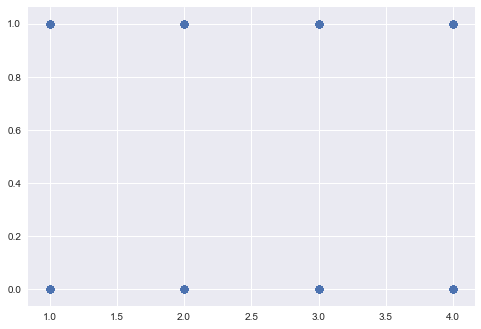

In [96]:
plt.scatter(data['age'],data['is_success'])
plt.show()

In [97]:
print(data.balance.value_counts())
print(data.job.value_counts())
print(data.duration.value_counts())
print(data.pdays.value_counts())
print(data.campaign.value_counts())
print(data.age.value_counts())

 3    13045
 2    11190
 4     7672
 1     5195
-1     3766
 0     3514
 5      829
Name: balance, dtype: int64
4     9732
1     9458
2     7597
6     5171
7     4154
5     2264
8     1579
3     1487
9     1303
11    1240
10     938
12     288
Name: job, dtype: int64
1.0    18001
2.0    10277
3.0     6515
4.0     5759
0.0     4659
Name: duration, dtype: int64
-1    36954
 3     6820
 2     1179
 1      258
Name: pdays, dtype: int64
2    18026
1    17544
3     9641
Name: campaign, dtype: int64
2    23733
3    13260
1     7030
4     1188
Name: age, dtype: int64
